# Load Required Libraries

In [1]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import keras
import optuna
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

c:\Users\Novin\.conda\envs\hamta2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Load MNIST dataset

In [2]:
(Xtr, Ytr), (Xte, Yte) = mnist.load_data()
print(f"X train Size: {Xtr.shape}\nTraining Target Size: {Ytr.shape}\nX test Size: {Xte.shape}\nTesting Target Size: {Yte.shape}\n")


X train Size: (60000, 28, 28)
Training Target Size: (60000,)
X test Size: (10000, 28, 28)
Testing Target Size: (10000,)



# Plot some digits

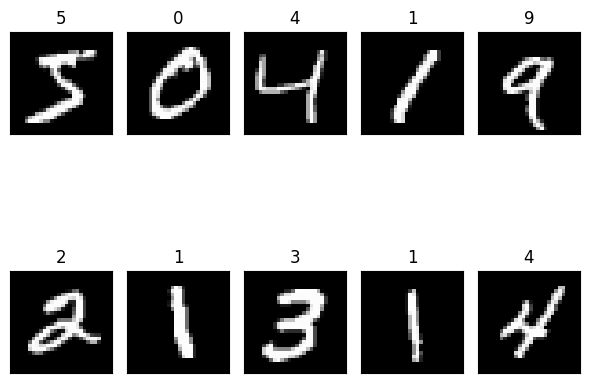

In [3]:
fig, ax = plt.subplots(2, 5, figsize = (6, 6))
for i in range(10):
    ax[i//5, i%5].imshow(Xtr[i], cmap='grey')
    ax[i//5, i%5].set_title(Ytr[i])
    ax[i//5, i%5].set_xticks([])
    ax[i//5, i%5].set_yticks([])
plt.tight_layout()
plt.show()

# Normalization

In [4]:
scaler = MinMaxScaler()
Xtr_N = scaler.fit_transform(Xtr.reshape(-1, Xtr.shape[1]*Xtr.shape[2]))
Xte_N = scaler.transform(Xte.reshape(-1, Xte.shape[1]*Xte.shape[2]))
print(f"Normalized X_train Size: {Xtr_N.shape}\nNormalized X_test Size: {Xte_N.shape}")

Normalized X_train Size: (60000, 784)
Normalized X_test Size: (10000, 784)


# One-hot encoding

In [5]:
Ytr_encoded = to_categorical(Ytr, num_classes=10)
Yte_encoded = to_categorical(Yte, num_classes=10)

# Building a simple DL-based classification model

In [6]:
model = models.Sequential()
model.add(layers.Dense(100, activation = 'relu', input_shape = (Xtr_N.shape[1],)))
model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))
model.summary()

c:\Users\Novin\.conda\envs\hamta2\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling & fitting

In [7]:
model.compile(
    loss = losses.CategoricalCrossentropy(),    # SparseCategoricalCrossentropy
    optimizer = optimizers.Adam(),              # Alternatives: RMSprop
    metrics = [metrics.CategoricalAccuracy()] 
)

His = model.fit(Xtr_N, Ytr_encoded, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - categorical_accuracy: 0.8495 - loss: 0.5010 - val_categorical_accuracy: 0.9533 - val_loss: 0.1551
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.9594 - loss: 0.1351 - val_categorical_accuracy: 0.9651 - val_loss: 0.1175
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.9730 - loss: 0.0875 - val_categorical_accuracy: 0.9643 - val_loss: 0.1150
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.9798 - loss: 0.0642 - val_categorical_accuracy: 0.9682 - val_loss: 0.1113
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.9835 - loss: 0.0510 - val_categorical_accuracy: 0.9693 - val_loss: 0.1043
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy: 0.9887 - loss: 0.0380 - val_categorical_accuracy: 0.9718 - val_loss: 0.1094
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - categorical_accuracy

# Prediction & results

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - categorical_accuracy: 0.9727 - loss: 0.2464
Evaluation results:
Val_loss (%) = 20.6006
Val_accuracy (%) = 97.6600
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step


Out of 10000 testing data, 234 are incorrect
about --> 2.34%


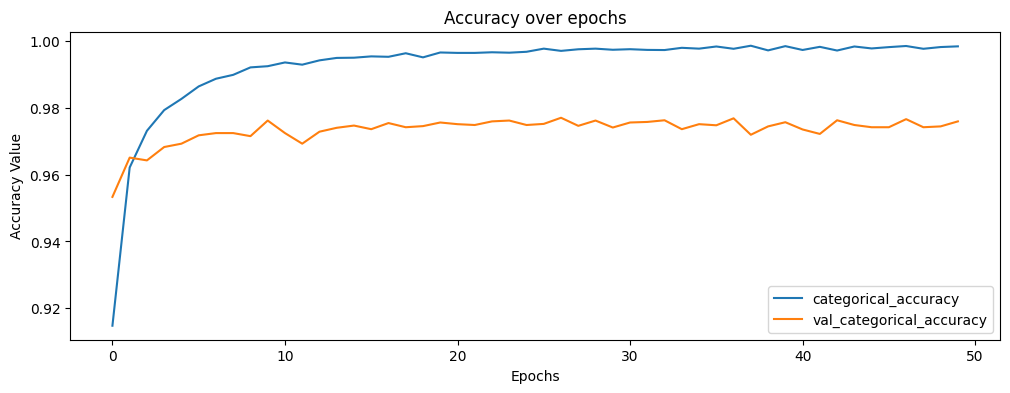

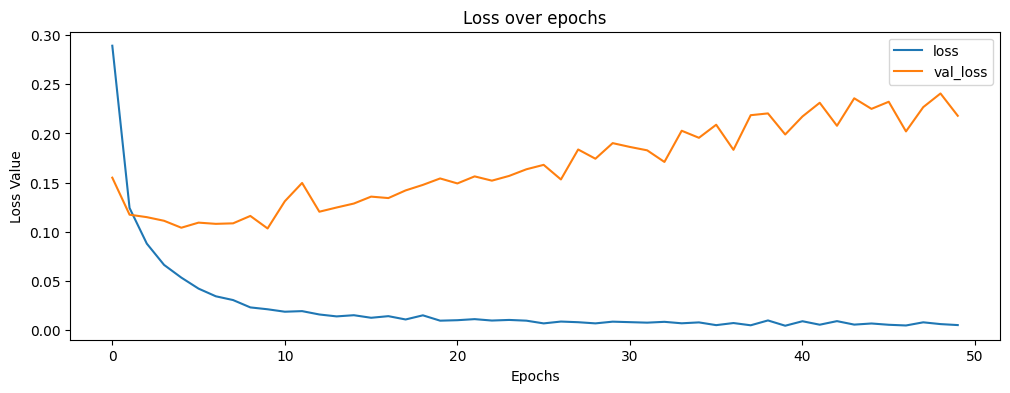

In [8]:

df1 = pd.DataFrame(His.history)
df1[['categorical_accuracy', 'val_categorical_accuracy']].plot(kind='line', xlabel='Epochs', ylabel='Accuracy Value',
                                                               title='Accuracy over epochs', legend=True, figsize=(12, 4))
df1[['loss', 'val_loss']].plot(kind='line', xlabel='Epochs', ylabel='Loss Value',
                                                               title='Loss over epochs', legend=True, figsize=(12, 4))
final_test_result = model.evaluate(Xte_N, Yte_encoded)
print(f"Evaluation results:\nVal_loss (%) = {final_test_result[0]*100:.4f}\nVal_accuracy (%) = {final_test_result[1]*100:.4f}")
y_pred = model.predict(Xte_N)   
y_pred = np.argmax(y_pred, axis=1)
y_true_y_pred = np.column_stack((Yte, y_pred))
print(f"\n\nOut of {Yte.shape[0]} testing data, {sum(y_true_y_pred[:, 0] != y_true_y_pred[:, 1])} are incorrect\nabout --> {100*(sum(y_true_y_pred[:, 0] != y_true_y_pred[:, 1])/Yte.shape[0])}%")


# Overfitting? 
Given the plots, it seems a kind of overfitting (unacceptable performance of model on validation dataset). Hence,
let's overcome it by offering more intricate network (maybe convnet is a good idea to start). Additionally, embedding a 
hyperparameter optimizer (like Optuna) can be profitable in terms of accuracy enhancement.  

In [20]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Define the model
model = models.Sequential([
    # I consider strides to boost computational runtime, also maxpooling layer, intensifying useful features
    Conv2D(filters = 32, kernel_size = (3,3), strides = 2, activation='relu', input_shape=(Xtr.shape[1], Xtr.shape[2], 1)), # input shape must be (height, width, channels)
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters = 64, kernel_size = (3,3), strides = 2, activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(), # Don't forget flattening  
    Dense(units = 128, activation='relu'),
    Dense(units = 10, activation='softmax') # there are ten classes !
])

def Objective(trial):
    opt = trial.suggest_categorical('opt', ['adam', 'rmsprop', 'SGD'])
    bs = trial.suggest_categorical('bs', [16, 32, 64, 128])
    lr = trial.suggest_float('lr', 1e-5, 1e-3)
    # Compile the model
    if opt == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=lr)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    ES_call = keras.callbacks.EarlyStopping(min_delta=0.01, patience=3, restore_best_weights=True)
    log = model.fit(Xtr_N.reshape(-1, 28, 28), Ytr_encoded, epochs=20, batch_size=bs, validation_split=0.2, callbacks=ES_call, verbose=False)
    return log.history['val_loss'][-1]
study = optuna.create_study(direction='minimize')
study.optimize(Objective, n_trials=5)
# Summary
# model.summary()


[I 2025-03-06 13:36:20,992] A new study created in memory with name: no-name-f2706563-5873-48a7-bd9e-3dfce210a502
[I 2025-03-06 13:37:29,812] Trial 0 finished with value: 0.11639907956123352 and parameters: {'opt': 'rmsprop', 'bs': 16, 'lr': 0.00014886039232172934}. Best is trial 0 with value: 0.11639907956123352.
[I 2025-03-06 13:37:46,447] Trial 1 finished with value: 0.10856430232524872 and parameters: {'opt': 'SGD', 'bs': 32, 'lr': 0.0009260982910389558}. Best is trial 1 with value: 0.10856430232524872.
[I 2025-03-06 13:37:56,395] Trial 2 finished with value: 0.0796169862151146 and parameters: {'opt': 'adam', 'bs': 128, 'lr': 0.0009038394697018365}. Best is trial 2 with value: 0.0796169862151146.
[I 2025-03-06 13:38:21,894] Trial 3 finished with value: 0.0975722149014473 and parameters: {'opt': 'adam', 'bs': 16, 'lr': 0.0009751885391524347}. Best is trial 2 with value: 0.0796169862151146.
[I 2025-03-06 13:38:52,926] Trial 4 finished with value: 0.07634652405977249 and parameters: {

In [21]:
study.best_params

{'opt': 'adam', 'bs': 16, 'lr': 3.443717627409603e-05}